In [2]:
# import another csv
df_1 = spark.read.csv('framingham.csv', inferSchema=True, header=True)

In [10]:
df_1.show(5)

print(df_1.count(),len(df_1.columns))

+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+-----+---------+-------+----------+
|male|age|education|currentSmoker|cigsPerDay|BPMeds|prevalentStroke|prevalentHyp|diabetes|totChol|sysBP|diaBP|  BMI|heartRate|glucose|TenYearCHD|
+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+-----+---------+-------+----------+
|   1| 39|        4|            0|         0|     0|              0|           0|       0|    195|106.0| 70.0|26.97|       80|     77|         0|
|   0| 46|        2|            0|         0|     0|              0|           0|       0|    250|121.0| 81.0|28.73|       95|     76|         0|
|   1| 48|        1|            1|        20|     0|              0|           0|       0|    245|127.5| 80.0|25.34|       75|     70|         0|
|   0| 61|        3|            1|        30|     0|              0|           1|       0|    225|150.0| 95.0|28.58|       6

In [9]:
#import materials
import pyspark.sql. functions as f
!pip3 install --user  scikit-learn

In [36]:
#for models
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.classification import LogisticRegression, OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier,RandomForestClassifier
from pyspark.ml import Pipeline

#import the evaluator.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

# Let's import the string indexer (similar to the logistic regression exercises).
from pyspark.ml.feature import StringIndexer

In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('722A4').getOrCreate()

# If you're getting an error with numpy, please type 'sudo pip install numpy --user' into the EC2 console.
#from pyspark.ml.classification import LogisticRegression

In [2]:
# 1. Change type
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType,BooleanType,DoubleType)

In [48]:
#step 1 - change schema and import dataset
data_schema = [StructField('cp',StringType(),True),
              StructField('oldpeak',BooleanType(),True)]

final_struct = StructType(fields=data_schema)

data_schema = [StructField('age',IntegerType(),True),
               StructField('sex',IntegerType(),True),
    StructField('cp',StringType(),True),
               StructField('trestbps',IntegerType(),True),
               StructField('chol',IntegerType(),True),
               StructField('fbs',IntegerType(),True),
               StructField('restecg',StringType(),True),
               StructField('thalach',IntegerType(),True),
               StructField('exang',IntegerType(),True),
               StructField('oldpeak',DoubleType(),True),
              StructField('slope',StringType(),True),
              StructField('ca',StringType(),True),
              StructField('thal',StringType(),True),
              StructField('target',IntegerType(),True)]


final_struct = StructType(fields=data_schema)

In [49]:
#df = spark.read.csv('heart.csv', schema=final_struct)


#df.printSchema()

#df_testS.printSchema()
#df.show()



df = spark.read.csv('heart.csv', schema=final_struct, header= True)

df.printSchema()
#df.show()
df.select('age', 'sex','cp','trestbps','chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak','slope', 'ca', 'thal', 'target').show()
#type(df)

root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- cp: string (nullable = true)
 |-- trestbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: string (nullable = true)
 |-- thalach: integer (nullable = true)
 |-- exang: integer (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- slope: string (nullable = true)
 |-- ca: string (nullable = true)
 |-- thal: string (nullable = true)
 |-- target: integer (nullable = true)

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|
| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|
| 41|  0|  1|     130| 204|  0|      0|    172|    0

In [51]:
# 2. add index for the dataset
from pyspark.sql.functions import monotonically_increasing_id 

df_index = df.select("*").withColumn("index", monotonically_increasing_id())
#test = df.rdd.map(lambda r: r.index).collect()
df_test = df_index.select('index','age','sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak','slope', 'ca', 'thal', 'target')
df_test.show()
print(df_test.count(),len(df_test.columns))


+-----+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|index|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+-----+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|    0| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|
|    1| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|
|    2| 41|  0|  1|     130| 204|  0|      0|    172|    0|    1.4|    2|  0|   2|     1|
|    3| 56|  1|  1|     120| 236|  0|      1|    178|    0|    0.8|    2|  0|   2|     1|
|    4| 57|  0|  0|     120| 354|  0|      1|    163|    1|    0.6|    2|  0|   2|     1|
|    5| 57|  1|  0|     140| 192|  0|      1|    148|    0|    0.4|    1|  0|   1|     1|
|    6| 56|  0|  1|     140| 294|  0|      0|    153|    0|    1.3|    1|  0|   2|     1|
|    7| 44|  1|  1|     120| 263|  0|      1|    173|    0|    0.0|    2|  0|   3|     1|
|    8| 52

In [52]:
# 3. reduce duplicated value
df_test1 = df_test.dropDuplicates(['age', 'sex','cp','trestbps','chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak','slope', 'ca', 'thal', 'target'])


In [53]:
df_test1.select('index').subtract(df_test1.select('index')).collect()
df_test1.filter(df_test1.index == 164).show()

df_test1.show()
print(df_test1.count(),len(df_test1.columns))

+-----+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|index|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+-----+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
+-----+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+

+-----+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|index|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+-----+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|    6| 56|  0|  1|     140| 294|  0|      0|    153|    0|    1.3|    1|  0|   2|     1|
|  219| 48|  1|  0|     130| 256|  1|      0|    150|    1|    0.0|    2|  2|   3|     0|
|   92| 52|  1|  2|     138| 223|  0|      1|    169|    0|    0.0|    2|  4|   2|     1|
|  151| 71|  0|  0|     112| 149|  0|      1|    125|    0|    1.6|    1|  0|   2|     1|
|  157| 3

In [54]:
#4. create dummy variables

from pyspark.sql import functions as F

chests = df_test1.select("cp").distinct().rdd.flatMap(lambda x: x).collect()
slopes = df_test1.select("slope").distinct().rdd.flatMap(lambda x: x).collect()
restecgs = df_test1.select("restecg").distinct().rdd.flatMap(lambda x: x).collect()
cas = df_test1.select("ca").distinct().rdd.flatMap(lambda x: x).collect()
thals = df_test1.select("thal").distinct().rdd.flatMap(lambda x: x).collect()

chests_expr = [F.when(F.col("cp") == ch, 1).otherwise(0).alias("TYPE_" + ch) for ch in chests]
slopes_expr = [F.when(F.col("slope") == sl, 1).otherwise(0).alias("s_slope_" + sl) for sl in slopes]
restecgs_expr = [F.when(F.col("restecg") == re, 1).otherwise(0).alias("r_ecg_" + re) for re in slopes]
cas_expr = [F.when(F.col("ca") == mel, 1).otherwise(0).alias("ca_" + mel) for mel in slopes]
thals_expr = [F.when(F.col("thal") == th, 1).otherwise(0).alias("thal_" + th) for th in slopes]

df_dum= df_test1.select( 'index','cp','slope','restecg','ca','thal', *chests_expr+slopes_expr+restecgs_expr+cas_expr+thals_expr)
df_dum.show()

+-----+---+-----+-------+---+----+------+------+------+------+---------+---------+---------+-------+-------+-------+----+----+----+------+------+------+
|index| cp|slope|restecg| ca|thal|TYPE_3|TYPE_0|TYPE_1|TYPE_2|s_slope_0|s_slope_1|s_slope_2|r_ecg_0|r_ecg_1|r_ecg_2|ca_0|ca_1|ca_2|thal_0|thal_1|thal_2|
+-----+---+-----+-------+---+----+------+------+------+------+---------+---------+---------+-------+-------+-------+----+----+----+------+------+------+
|    6|  1|    1|      0|  0|   2|     0|     0|     1|     0|        0|        1|        0|      1|      0|      0|   1|   0|   0|     0|     0|     1|
|  219|  0|    2|      0|  2|   3|     0|     1|     0|     0|        0|        0|        1|      1|      0|      0|   0|   0|   1|     0|     0|     0|
|   92|  2|    2|      1|  4|   2|     0|     0|     0|     1|        0|        0|        1|      0|      1|      0|   0|   0|   0|     0|     0|     1|
|  151|  0|    1|      1|  0|   2|     0|     1|     0|     0|        0|        1|

In [55]:
#merge two dataframe
df_2 = df_test1.drop('cp','restecg','slope','ca','thal')
#df_2.show()
#print(df_2.count(),len(df_2.columns))


df2dum = df_2.join(df_dum, on=['index'], how='right_outer')
#df2dum.show()
#print(df2dum.count(),len(df2dum.columns))

df2dum_dr = df2dum.drop('cp','restecg','slope','ca','thal')
df2dum_dr.show()
print(df2dum_dr.count(),len(df2dum_dr.columns))

+-----+---+---+--------+----+---+-------+-----+-------+------+------+------+------+------+---------+---------+---------+-------+-------+-------+----+----+----+------+------+------+
|index|age|sex|trestbps|chol|fbs|thalach|exang|oldpeak|target|TYPE_3|TYPE_0|TYPE_1|TYPE_2|s_slope_0|s_slope_1|s_slope_2|r_ecg_0|r_ecg_1|r_ecg_2|ca_0|ca_1|ca_2|thal_0|thal_1|thal_2|
+-----+---+---+--------+----+---+-------+-----+-------+------+------+------+------+------+---------+---------+---------+-------+-------+-------+----+----+----+------+------+------+
|    6| 56|  0|     140| 294|  0|    153|    0|    1.3|     1|     0|     0|     1|     0|        0|        1|        0|      1|      0|      0|   1|   0|   0|     0|     0|     1|
|  219| 48|  1|     130| 256|  1|    150|    1|    0.0|     0|     0|     1|     0|     0|        0|        0|        1|      1|      0|      0|   0|   0|   1|     0|     0|     0|
|   92| 52|  1|     138| 223|  0|    169|    0|    0.0|     1|     0|     0|     0|     1|     

In [56]:
#5.Rename variables
from pyspark.sql.functions import col

mapping = dict(zip(['age', 'sex', 'trestbps','chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'target'], 
                   ['Age', 'Sex','Resting_Blood_Pressure','Serum_Chol','Fasting_Blood_Sugar','Max_Heart','Exercise_Ang','Oldpeak','Target']))
#df = df.select([col(c).alias(mapping.get(c, c)) for c in df.columns])
#df.show()

df_ref = df2dum_dr.select([col(c).alias(mapping.get(c, c)) for c in df2dum_dr.columns])
df_ref.show(1)

print(df_ref.count(),len(df_ref.columns))

+-----+---+---+----------------------+----------+-------------------+---------+------------+-------+------+------+------+------+------+---------+---------+---------+-------+-------+-------+----+----+----+------+------+------+
|index|Age|Sex|Resting_Blood_Pressure|Serum_Chol|Fasting_Blood_Sugar|Max_Heart|Exercise_Ang|Oldpeak|Target|TYPE_3|TYPE_0|TYPE_1|TYPE_2|s_slope_0|s_slope_1|s_slope_2|r_ecg_0|r_ecg_1|r_ecg_2|ca_0|ca_1|ca_2|thal_0|thal_1|thal_2|
+-----+---+---+----------------------+----------+-------------------+---------+------------+-------+------+------+------+------+------+---------+---------+---------+-------+-------+-------+----+----+----+------+------+------+
|    6| 56|  0|                   140|       294|                  0|      153|           0|    1.3|     1|     0|     0|     1|     0|        0|        1|        0|      1|      0|      0|   1|   0|   0|     0|     0|     1|
+-----+---+---+----------------------+----------+-------------------+---------+------------+----

In [59]:
#6. drop index
df_ref_dr = df_ref.drop('index')
df_ref_dr.show(1)

+---+---+----------------------+----------+-------------------+---------+------------+-------+------+------+------+------+------+---------+---------+---------+-------+-------+-------+----+----+----+------+------+------+
|Age|Sex|Resting_Blood_Pressure|Serum_Chol|Fasting_Blood_Sugar|Max_Heart|Exercise_Ang|Oldpeak|Target|TYPE_3|TYPE_0|TYPE_1|TYPE_2|s_slope_0|s_slope_1|s_slope_2|r_ecg_0|r_ecg_1|r_ecg_2|ca_0|ca_1|ca_2|thal_0|thal_1|thal_2|
+---+---+----------------------+----------+-------------------+---------+------------+-------+------+------+------+------+------+---------+---------+---------+-------+-------+-------+----+----+----+------+------+------+
| 56|  0|                   140|       294|                  0|      153|           0|    1.3|     1|     0|     0|     1|     0|        0|        1|        0|      1|      0|      0|   1|   0|   0|     0|     0|     1|
+---+---+----------------------+----------+-------------------+---------+------------+-------+------+------+------+-----

In [60]:
#7. correlation 'target' 

from pyspark.ml.feature import VectorAssembler


features = df_ref_dr.rdd.map(lambda row: row[0:])

from pyspark.mllib.stat import Statistics

corr_mat=Statistics.corr(features, method="pearson")

#corr_mat.show()

#from pyspark.mllib.stat import Statistics
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("722A4").setMaster("local[*]")
sc = SparkContext.getOrCreate(conf)

#arr = np.array([[2,3], [2,8], [2,3],[4,5]])

#from pyspark import SparkContext
#sc = SparkContext().getOrCreate(conf=conf)

rdd1 = sc.parallelize(corr_mat)
rdd2 = rdd1.map(lambda x: [float(i) for i in x])
dftest= rdd2.toDF(["Age", "Sex",'Resting_Blood_Pressure','Secrum_Chol','Fasting_Blood_Sugar','Max_Heart','Exercise_Ang','Oldpeak','Target','TYPE_3','TYPE_0','TYPE_1','TYPE_2','s_slope_0','s_slope_1','s_slope_2','r_ecg_0','r_ecg_1','r_ecg_2','ca_0','ca_1','ca_2','thal_0','thal_1','thal_2'])
dftest.select('Target').show(30)
print(len(dftest.columns))
#SparkContext

+--------------------+
|              Target|
+--------------------+
|-0.22147582776656233|
|-0.28360935779586227|
|-0.14626866384154857|
|-0.08143720051844015|
|-0.02682597056597...|
|  0.4199550436638703|
|  -0.435600761713619|
| -0.4291458328867387|
|                 1.0|
| 0.08795861420425949|
| -0.5146259015852098|
| 0.24764940489181725|
|  0.3136956289926146|
|-0.06282208501011849|
| -0.3602579704957518|
| 0.39212098451106003|
| -0.1572988206594055|
|  0.1728271151630892|
|-0.06815593296585137|
|  0.4708489065013783|
|-0.23125456761608354|
|-0.27329463946678584|
|-0.00705563743111...|
|-0.10598586814646635|
|  0.5260296712540147|
+--------------------+

25


In [61]:
dftest_dr85 = dftest.drop('Secrum_Chol','Resting_Blood_Pressure', 'Fasting_Blood_Sugar','TYPE_3','s_slope_0','r_ecg_0','r_ecg_1','r_ecg_2','thal_1','thal_0')
dftest_dr85.select('Target').show()

+--------------------+
|              Target|
+--------------------+
|-0.22147582776656233|
|-0.28360935779586227|
|-0.14626866384154857|
|-0.08143720051844015|
|-0.02682597056597...|
|  0.4199550436638703|
|  -0.435600761713619|
| -0.4291458328867387|
|                 1.0|
| 0.08795861420425949|
| -0.5146259015852098|
| 0.24764940489181725|
|  0.3136956289926146|
|-0.06282208501011849|
| -0.3602579704957518|
| 0.39212098451106003|
| -0.1572988206594055|
|  0.1728271151630892|
|-0.06815593296585137|
|  0.4708489065013783|
+--------------------+
only showing top 20 rows



In [18]:
#8.reduce predictor 
dftest_dr= dftest.drop('Secrum_Chol','Fasting_Blood_Sugar','TYPE_3','s_slope_0','r_ecg_2','thal_0')
dftest_dr.select('Target').show()

+--------------------+
|              Target|
+--------------------+
|-0.22147582776656233|
|-0.28360935779586227|
|-0.14626866384155357|
|-0.08143720051844038|
|-0.02682597056597...|
|  0.4199550436638686|
|  -0.435600761713619|
|-0.42914583288673863|
|                 1.0|
| 0.08795861420425949|
| -0.5146259015852098|
| 0.24764940489181725|
|  0.3136956289926146|
|-0.06282208501011849|
| -0.3602579704957518|
| 0.39212098451106003|
| -0.1572988206594055|
|  0.1728271151630892|
|-0.06815593296585137|
|  0.4708489065013783|
+--------------------+
only showing top 20 rows



In [62]:
#9. re-cal important feature 
features = dftest_dr85.rdd.map(lambda row: row[0:])

from pyspark.mllib.stat import Statistics

corr_mat=Statistics.corr(features, method="pearson")

#corr_mat.show()

#from pyspark.mllib.stat import Statistics
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("722A4").setMaster("local[*]")
sc = SparkContext.getOrCreate(conf)

#arr = np.array([[2,3], [2,8], [2,3],[4,5]])

#from pyspark import SparkContext
#sc = SparkContext().getOrCreate(conf=conf)

rdd1 = sc.parallelize(corr_mat)
rdd2 = rdd1.map(lambda x: [float(i) for i in x])
#dftest_dr_no45= rdd2.toDF(["Age", "Sex",'Resting_Blood_Pressure','Max_Heart','Exercise_Ang','Oldpeak','Target','TYPE_0','TYPE_1','TYPE_2','s_slope_1','s_slope_2','r_ecg_0','r_ecg_1','ca_0','ca_1','ca_2','thal_1','thal_2'])
dftest_dr_no85= rdd2.toDF(["Age", "Sex",'Max_Heart','Exercise_Ang','Oldpeak','Target','TYPE_0','TYPE_1','TYPE_2','s_slope_1','s_slope_2','ca_0','ca_1','ca_2','thal_2'])

#"Age", "Sex",'Resting_Blood_Pressure','Max_Heart','Exercise_Ang','Oldpeak','Target','TYPE_0','TYPE_1','TYPE_2','s_slope_1','s_slope_2','r_ecg_0','r_ecg_1','ca_0','ca_1','ca_2','thal_1','thal_2'
#dftest_dr_no45.select('Target').show(30)
dftest_dr_no85.select('Target').show(30)
print(len(dftest_dr_no85.columns))

+--------------------+
|              Target|
+--------------------+
| -0.6183469465515441|
|-0.49410803972990724|
|  0.8275728355279159|
| -0.8495333967456351|
|  -0.810893561972993|
|                 1.0|
| -0.8530917513974235|
|  0.6065794831408383|
|  0.6116043819492523|
| -0.7113609544391627|
|  0.7482272069166754|
|  0.7751762914504503|
| -0.4660604901189473|
| -0.5731287981012947|
|  0.8751265518374562|
+--------------------+

15


In [30]:
#10. drop name, show corresponding number -- just for show
#df_refdr2 = df_ref_dr.drop('Serum_Chol', 'Fasting_Blood_Sugar', 'TYPE_3', 's_slope_0', 'r_ecg_2', 'thal_0')
#8.5 
df_refdr3 = df_ref_dr.drop('Serum_Chol', 'Resting_Blood_Pressure','r_ecg_0','r_ecg_1', 'thal_1','Fasting_Blood_Sugar', 'TYPE_3', 's_slope_0', 'r_ecg_2', 'thal_0')

df_refdr3.columns


['Age',
 'Sex',
 'Max_Heart',
 'Exercise_Ang',
 'Oldpeak',
 'Target',
 'TYPE_0',
 'TYPE_1',
 'TYPE_2',
 's_slope_1',
 's_slope_2',
 'ca_0',
 'ca_1',
 'ca_2',
 'thal_2']

In [31]:
#11. 4.2 project the data
import pandas as pd

from sklearn.utils import resample

#Heart_Disease = df_refdr2.toPandas()[df_refdr2.toPandas().Target==1]
#No_Heart_Disease = df_refdr2.toPandas()[df_refdr2.toPandas().Target==0]
#8.5
Heart_Disease = df_refdr3.toPandas()[df_refdr3.toPandas().Target==1]
No_Heart_Disease = df_refdr3.toPandas()[df_refdr3.toPandas().Target==0]

Target_0 = resample(No_Heart_Disease,
                   replace=True,
                   n_samples=164,
                   random_state=100)

#df_refdr2_upsam = pd.concat([Heart_Disease,Target_0])
df_refdr3_upsam = pd.concat([Heart_Disease,Target_0])

df_refdr3_upsam.Target.value_counts()


1    164
0    164
Name: Target, dtype: int64

In [32]:
spark = SparkSession.builder.getOrCreate()

df_data = spark.createDataFrame(df_refdr2_upsam)

df_data85.columns 

['Age',
 'Sex',
 'Max_Heart',
 'Exercise_Ang',
 'Oldpeak',
 'Target',
 'TYPE_0',
 'TYPE_1',
 'TYPE_2',
 's_slope_1',
 's_slope_2',
 'ca_0',
 'ca_1',
 'ca_2',
 'thal_2']

In [ ]:
df_data85 = spark.createDataFrame(df_refdr3_upsam)

In [ ]:
# Combine all features into one vector named features.
assembler = VectorAssembler(
  inputCols=['Age',
 'Sex',
 'Resting_Blood_Pressure',
 'Max_Heart',
 'Exercise_Ang',
 'Oldpeak',
 'TYPE_0',
 'TYPE_1',
 'TYPE_2',
 's_slope_1',
 's_slope_2',
 'r_ecg_0',
 'r_ecg_1',
 'ca_0',
 'ca_1',
 'ca_2',
 'thal_1',
 'thal_2'],
              outputCol="features")


In [33]:
#8.5
assembler2 = VectorAssembler(
  inputCols=['Age',
 'Sex',
 'Max_Heart',
 'Exercise_Ang',
 'Oldpeak',
 'TYPE_0',
 'TYPE_1',
 'TYPE_2',
 's_slope_1',
 's_slope_2',
 'ca_0',
 'ca_1',
 'ca_2',
 'thal_2'],
              outputCol="features")

In [34]:
# Let's transform the data. 
#output = assembler.transform(df_data)
#8.5
output85 = assembler2.transform(df_data85)

In [38]:
indexer = StringIndexer(inputCol="Target", outputCol="TargetIndex")
#output_fixed = indexer.fit(output).transform(output)

output_fixed85 = indexer.fit(output85).transform(output85)

In [39]:
# Let's select the two columns we want. Features (which contains vectors), and the predictor.
#final_data = output_fixed.select("features",'TargetIndex')

final_data85 = output_fixed85.select("features",'TargetIndex')

In [40]:
# Split the training and testing set.
#train_data,test_data = final_data.randomSplit([0.7,0.3])

# 85
train_data85,test_data85 = final_data85.randomSplit([0.7,0.3])

In [42]:
#8.5.test reduce more predictor of dct 
dtc_def85 = DecisionTreeClassifier(
    labelCol='TargetIndex',
    featuresCol='features')

acc_evaluator = MulticlassClassificationEvaluator(labelCol="TargetIndex", predictionCol="prediction", metricName="accuracy")
dtc63_model_def85 = dtc_def85.fit(train_data85)
dtc63_predictions_def85 = dtc63_model_def85.transform(test_data85)
dtc63_acc_def85 = acc_evaluator.evaluate(dtc63_predictions_def85)
print('-'*40)
print('An ensemble using Decision Tree has an accuracy of: {0:2.2f}%'.format(dtc63_acc_def85*100))

----------------------------------------
An ensemble using Decision Tree has an accuracy of: 80.39%


In [43]:
dtc63_model_def85.featureImportances

SparseVector(14, {0: 0.1989, 1: 0.0286, 2: 0.1509, 4: 0.0361, 5: 0.3203, 6: 0.0155, 8: 0.0568, 10: 0.1018, 11: 0.021, 13: 0.0702})

Text(0,0.5,'Importance degree')

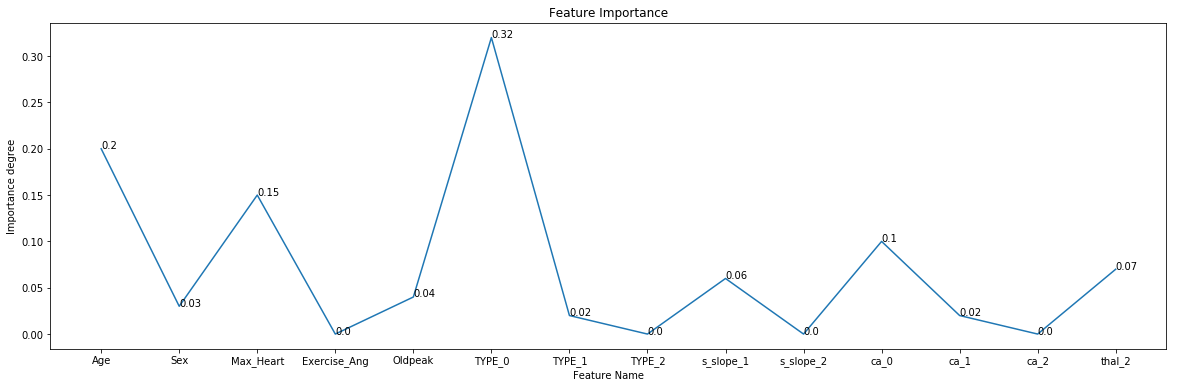

In [45]:
# drawn feature importance 
import numpy as np 
import matplotlib.pyplot as plt 

feature_name85 = ['Age','Sex','Max_Heart',
                'Exercise_Ang','Oldpeak','TYPE_0','TYPE_1',
                'TYPE_2','s_slope_1','s_slope_2',
            'ca_0','ca_1','ca_2','thal_2']

#round importance values 
list_importance85 = np.array(dtc63_model_def85.featureImportances)
list_importance8 = [round(elem, 2) for elem in list_importance85]

plt.figure (figsize =(20,6))
plt.plot (feature_name85, list_importance8)
for a,b in zip(feature_name85, list_importance8):
    plt.text (a,b,str(b))
    
#add title
plt.title ('Feature Importance')
plt.xlabel('Feature Name')
plt.ylabel('Importance degree')

In [46]:
evaluator = BinaryClassificationEvaluator(labelCol = 'TargetIndex')
print("Test Area Under ROC: " + str(evaluator.evaluate(dtc63_predictions_def85, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8989197530864198


In [47]:
print(dtc63_model_def85.toDebugString)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_4f04a33949518a744e52) of depth 5 with 49 nodes
  If (feature 5 <= 0.0)
   If (feature 0 <= 56.0)
    If (feature 4 <= 1.9)
     If (feature 0 <= 49.0)
      If (feature 0 <= 45.0)
       Predict: 1.0
      Else (feature 0 > 45.0)
       Predict: 1.0
     Else (feature 0 > 49.0)
      Predict: 1.0
    Else (feature 4 > 1.9)
     If (feature 2 <= 139.0)
      Predict: 0.0
     Else (feature 2 > 139.0)
      Predict: 1.0
   Else (feature 0 > 56.0)
    If (feature 8 <= 0.0)
     If (feature 6 <= 0.0)
      If (feature 4 <= 0.0)
       Predict: 1.0
      Else (feature 4 > 0.0)
       Predict: 1.0
     Else (feature 6 > 0.0)
      If (feature 0 <= 58.0)
       Predict: 0.0
      Else (feature 0 > 58.0)
       Predict: 1.0
    Else (feature 8 > 0.0)
     If (feature 11 <= 0.0)
      If (feature 2 <= 147.0)
       Predict: 1.0
      Else (feature 2 > 147.0)
       Predict: 0.0
     Else (feature 11 > 0.0)
      If (feature 0 <= 65.0)


In [119]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('pm').getOrCreate()
from pyspark.sql.types import IntegerType,FloatType
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression,DecisionTreeClassifier,RandomForestClassifier
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [3]:
# Reads schema and accepts that the data has a header.
#df = spark.read.csv('heart.csv', inferSchema=True, header=True)

df = spark.read.csv('heart.csv', inferSchema=True, header=True)

In [12]:
# Let's see the data.
df.show(5)
print(df.count(),len(df.columns))

# You could also try this. 
#df.columns

# And the data schema.
df.printSchema()

# Instead, let's just grab the first row. Much neater! 
df.head(1)

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|
| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|
| 41|  0|  1|     130| 204|  0|      0|    172|    0|    1.4|    2|  0|   2|     1|
| 56|  1|  1|     120| 236|  0|      1|    178|    0|    0.8|    2|  0|   2|     1|
| 57|  0|  0|     120| 354|  0|      1|    163|    1|    0.6|    2|  0|   2|     1|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
only showing top 5 rows

303 14
root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trestbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nul

[Row(age=63, sex=1, cp=3, trestbps=145, chol=233, fbs=1, restecg=0, thalach=150, exang=0, oldpeak=2.3, slope=0, ca=0, thal=1, target=1)]

In [10]:
#from pyspark import SparkContext
#sc = SparkContext()
#df.groupby('age').count().show()
#df.groupby('target').count().show()
df.crosstab('Age', 'target').show()

+----------+---+---+
|Age_target|  0|  1|
+----------+---+---+
|        69|  1|  2|
|        56|  6|  5|
|        42|  1|  7|
|        37|  0|  2|
|        52|  4|  9|
|        46|  3|  4|
|        57| 10|  7|
|        29|  0|  1|
|        61|  7|  1|
|        74|  0|  1|
|        60|  8|  3|
|        38|  1|  2|
|        70|  3|  1|
|        65|  4|  4|
|        53|  2|  6|
|        77|  1|  0|
|        41|  1|  9|
|        34|  0|  2|
|        45|  2|  6|
|        64|  4|  6|
+----------+---+---+
only showing top 20 rows



In [22]:
#df.select('oldpeak').printSchema()
#df_test.select('target').printSchema()

root
 |-- target: integer (nullable = true)



In [8]:
#import decimal
decimal.getcontext()

Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

In [17]:
df.describe().show()

+-------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|summary|               age|                sex|                cp|          trestbps|              chol|                fbs|          restecg|           thalach|              exang|           oldpeak|             slope|                ca|              thal|            target|
+-------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|  count|               303|                303|               303|               303|               303|                303|              303|               303|    

In [20]:
df.describe('age', 'sex', 'cp', 'trestbps').show()

+-------+------------------+-------------------+------------------+------------------+
|summary|               age|                sex|                cp|          trestbps|
+-------+------------------+-------------------+------------------+------------------+
|  count|               303|                303|               303|               303|
|   mean|54.366336633663366| 0.6831683168316832| 0.966996699669967|131.62376237623764|
| stddev|  9.08210098983786|0.46601082333962385|1.0320524894832983|  17.5381428135171|
|    min|                29|                  0|                 0|                94|
|    max|                77|                  1|                 3|               200|
+-------+------------------+-------------------+------------------+------------------+



In [23]:
df.describe('chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak').show()

+-------+------------------+-------------------+-----------------+------------------+-------------------+------------------+
|summary|              chol|                fbs|          restecg|           thalach|              exang|           oldpeak|
+-------+------------------+-------------------+-----------------+------------------+-------------------+------------------+
|  count|               303|                303|              303|               303|                303|               303|
|   mean|246.26402640264027| 0.1485148514851485|0.528052805280528|149.64686468646866|0.32673267326732675|1.0396039603960396|
| stddev| 51.83075098793005|0.35619787492797644|0.525859596359298| 22.90516111491409|0.46979446452231655|1.1610750220686346|
|    min|               126|                  0|                0|                71|                  0|               0.0|
|    max|               564|                  1|                2|               202|                  1|               6.2|


In [24]:
df.describe('slope', 'ca', 'thal', 'target').show()

+-------+------------------+------------------+------------------+------------------+
|summary|             slope|                ca|              thal|            target|
+-------+------------------+------------------+------------------+------------------+
|  count|               303|               303|               303|               303|
|   mean|1.3993399339933994|0.7293729372937293|2.3135313531353137|0.5445544554455446|
| stddev|0.6162261453459622|1.0226063649693276|0.6122765072781408|0.4988347841643915|
|    min|                 0|                 0|                 0|                 0|
|    max|                 2|                 4|                 3|                 1|
+-------+------------------+------------------+------------------+------------------+



In [57]:
import numpy as np
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    ser = np.zeros(len(ys))
    pos =np.where((ys > upper_bound) | (ys < lower_bound))[0]
    ser[pos]=1
    return(ser)

In [65]:
#drop fbs
df2 = df.drop("fbs")
df2.show()
df.show()

+---+---+---+--------+----+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+-------+-------+-----+-------+-----+---+----+------+
| 63|  1|  3|     145| 233|      0|    150|    0|    2.3|    0|  0|   1|     1|
| 37|  1|  2|     130| 250|      1|    187|    0|    3.5|    0|  0|   2|     1|
| 41|  0|  1|     130| 204|      0|    172|    0|    1.4|    2|  0|   2|     1|
| 56|  1|  1|     120| 236|      1|    178|    0|    0.8|    2|  0|   2|     1|
| 57|  0|  0|     120| 354|      1|    163|    1|    0.6|    2|  0|   2|     1|
| 57|  1|  0|     140| 192|      1|    148|    0|    0.4|    1|  0|   1|     1|
| 56|  0|  1|     140| 294|      0|    153|    0|    1.3|    1|  0|   2|     1|
| 44|  1|  1|     120| 263|      1|    173|    0|    0.0|    2|  0|   3|     1|
| 52|  1|  2|     172| 199|      1|    162|    0|    0.5|    2|  0|   3|     1|
| 57|  1|  2|     150| 168|      1|    1

In [67]:
#detect outliers
for c in bounds:
    iqr = bounds[c]['q3'] - bounds[c]['q1']
    bounds[c]['lower'] = bounds[c]['q1'] - (iqr * 1.5)
    bounds[c]['upper'] = bounds[c]['q3'] + (iqr * 1.5)
print(bounds)

{'exang': {'q3': 1.0, 'upper': 2.5, 'lower': -1.5, 'q1': 0.0}, 'trestbps': {'q3': 140.0, 'upper': 170.0, 'lower': 90.0, 'q1': 120.0}, 'oldpeak': {'q3': 1.6, 'upper': 4.0, 'lower': -2.4000000000000004, 'q1': 0.0}, 'chol': {'q3': 275.0, 'upper': 371.0, 'lower': 115.0, 'q1': 211.0}, 'thal': {'q3': 3.0, 'upper': 4.5, 'lower': 0.5, 'q1': 2.0}, 'sex': {'q3': 1.0, 'upper': 2.5, 'lower': -1.5, 'q1': 0.0}, 'age': {'q3': 61.0, 'upper': 80.5, 'lower': 28.5, 'q1': 48.0}, 'ca': {'q3': 1.0, 'upper': 2.5, 'lower': -1.5, 'q1': 0.0}, 'slope': {'q3': 2.0, 'upper': 3.5, 'lower': -0.5, 'q1': 1.0}, 'cp': {'q3': 2.0, 'upper': 5.0, 'lower': -3.0, 'q1': 0.0}, 'restecg': {'q3': 1.0, 'upper': 2.5, 'lower': -1.5, 'q1': 0.0}, 'target': {'q3': 1.0, 'upper': 2.5, 'lower': -1.5, 'q1': 0.0}, 'thalach': {'q3': 167.0, 'upper': 216.5, 'lower': 84.5, 'q1': 134.0}}


In [69]:
df.select(
    "*",
    *[
        f.when(
            f.col(c).between(bounds[c]['lower'], bounds[c]['upper']),
            0
        ).otherwise(1).alias(c+"_out") 
        for c in df2.columns
    ]
).show()

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+-------+-------+------+------------+--------+-----------+-----------+---------+-----------+---------+------+--------+----------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|age_out|sex_out|cp_out|trestbps_out|chol_out|restecg_out|thalach_out|exang_out|oldpeak_out|slope_out|ca_out|thal_out|target_out|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+-------+-------+------+------------+--------+-----------+-----------+---------+-----------+---------+------+--------+----------+
| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|      0|      0|     0|           0|       0|          0|          0|        0|          0|        0|     0|       0|         0|
| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|      0|      0|     0|           0|       0|          0|          0|

In [80]:
#missing value detect
from pyspark.sql.functions import col
df.describe().filter(col("summary") == "count").show()

+-------+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|summary|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+-------+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|  count|303|303|303|     303| 303|303|    303|    303|  303|    303|  303|303| 303|   303|
+-------+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+



In [82]:
from pyspark.sql.functions import lit

row = df.count()
summary = df.describe().filter(col("summary")=="count")
summary.select(*((lit(row)-col(c)).alias(c) for c in df.columns)).show()


+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|0.0|0.0|0.0|     0.0| 0.0|0.0|    0.0|    0.0|  0.0|    0.0|  0.0|0.0| 0.0|   0.0|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ffc3316a0>]],
      dtype=object)

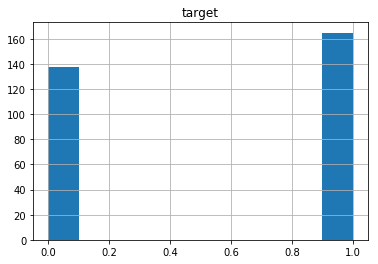

In [143]:
df.select('target').sample(False, 0.999).toPandas().hist()

In [18]:
type(df)

pyspark.sql.dataframe.DataFrame

In [12]:
#6 rename
from pyspark.sql.functions import col

mapping = dict(zip(['age', 'sex', 'trestbps','chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'target'], 
                   ['Age', 'Sex','Resting_Blood_Pressure','Serum_Chol','Fasting_Blood_Sugar','Max_Heart','Exercise_Ang','Oldpeak','Target']))
#df = df.select([col(c).alias(mapping.get(c, c)) for c in df.columns])
#df.show()

df_ref = df2dum_dr.select([col(c).alias(mapping.get(c, c)) for c in df2dum_dr.columns])
df_ref.show(1)

print(df_ref.count(),len(df_ref.columns))

+-----+---+---+----------------------+----------+-------------------+---------+------------+-------+------+------+------+------+------+---------+---------+---------+-------+-------+-------+----+----+----+------+------+------+
|index|Age|Sex|Resting_Blood_Pressure|Serum_Chol|Fasting_Blood_Sugar|Max_Heart|Exercise_Ang|Oldpeak|Target|TYPE_3|TYPE_0|TYPE_1|TYPE_2|s_slope_0|s_slope_1|s_slope_2|r_ecg_0|r_ecg_1|r_ecg_2|ca_0|ca_1|ca_2|thal_0|thal_1|thal_2|
+-----+---+---+----------------------+----------+-------------------+---------+------------+-------+------+------+------+------+------+---------+---------+---------+-------+-------+-------+----+----+----+------+------+------+
|  244| 56|  1|                   132|       184|                  0|      105|           1|    2.1|     0|     0|     1|     0|     0|        0|        1|        0|      1|      0|      0|   0|   1|   0|     0|     1|     0|
+-----+---+---+----------------------+----------+-------------------+---------+------------+----

In [57]:
df_ref_dr.columns

['Age',
 'Sex',
 'Resting_Blood_Pressure',
 'Serum_Chol',
 'Fasting_Blood_Sugar',
 'Max_Heart',
 'Exercise_Ang',
 'Oldpeak',
 'Target',
 'TYPE_3',
 'TYPE_0',
 'TYPE_1',
 'TYPE_2',
 's_slope_0',
 's_slope_1',
 's_slope_2',
 'r_ecg_0',
 'r_ecg_1',
 'r_ecg_2',
 'ca_0',
 'ca_1',
 'ca_2',
 'thal_0',
 'thal_1',
 'thal_2']

In [47]:
df_test.columns

['index',
 'Age',
 'Sex',
 'Chest_Pain_Type',
 'Resting_Blood_Pressure',
 'Serum_Chol',
 'Fasting_Blood_Sugar',
 'Rest_Ecg',
 'Max_Heart',
 'Exercise_Angina',
 'Oldpeak',
 'ST_Slope',
 'Num_Major_Vessels',
 'Thal',
 'Target']

In [54]:
#create dummy variables
from pyspark.sql import functions as F
#categories = df_test.select("Chest_Pain_Type", "Thal", "ST_Slope", "Num_Major_Vessels", "Rest_Ecg").distinct().rdd.flatMap(lambda x: x).collect()
categories = df_test.select("Chest_Pain_Type").distinct().rdd.flatMap(lambda x: x).collect()

categories

[1, 3, 2, 0]

In [86]:
#from pyspark.sql.functions import *
df = df.withColumn('Chest_Pain_Type', regexp_replace('Chest_Pain_Type', '0', 'A'))
df = df.withColumn('Chest_Pain_Type', regexp_replace('Chest_Pain_Type', '1', 'B'))
df = df.withColumn('Chest_Pain_Type', regexp_replace('Chest_Pain_Type', '2', 'C'))
df = df.withColumn('Chest_Pain_Type', regexp_replace('Chest_Pain_Type', '3', 'D'))
df.select('Chest_Pain_Type').show()

+---------------+
|Chest_Pain_Type|
+---------------+
|              D|
|              C|
|              B|
|              B|
|              A|
|              A|
|              B|
|              B|
|              C|
|              C|
|              A|
|              C|
|              B|
|              D|
|              D|
|              C|
|              C|
|              D|
|              A|
|              D|
+---------------+
only showing top 20 rows



In [50]:
from pyspark.sql.functions import monotonically_increasing_id 

df_index = df.select("*").withColumn("index", monotonically_increasing_id())
#test = df.rdd.map(lambda r: r.index).collect()
df = df_index.select('index','age','sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak','slope', 'ca', 'thal', 'target')
df.show()
print(df.count(),len(df.columns))

+-----+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|index|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+-----+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|    0| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|
|    1| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|
|    2| 41|  0|  1|     130| 204|  0|      0|    172|    0|    1.4|    2|  0|   2|     1|
|    3| 56|  1|  1|     120| 236|  0|      1|    178|    0|    0.8|    2|  0|   2|     1|
|    4| 57|  0|  0|     120| 354|  0|      1|    163|    1|    0.6|    2|  0|   2|     1|
|    5| 57|  1|  0|     140| 192|  0|      1|    148|    0|    0.4|    1|  0|   1|     1|
|    6| 56|  0|  1|     140| 294|  0|      0|    153|    0|    1.3|    1|  0|   2|     1|
|    7| 44|  1|  1|     120| 263|  0|      1|    173|    0|    0.0|    2|  0|   3|     1|
|    8| 52

In [12]:
#exprs = [F.when(F.col("Chest_Pain_Type") == category, 1).otherwise(0).alias(category)
#         for category in categories]

#exprs = [F.when(F.col("Chest_Pain_Type") == category, 1).otherwise(0).alias(category)
#         for category in categories]

#df_test2= df_test.select("index", *exprs).show()


#from pyspark.sql import functions as F

#df4 = sqlContext.createDataFrame([
#    (1, "a"),
#    (2, "b"),
#    (3, "c"),
#], ["ID", "Text"])

#categories = df4.select("Text").distinct().rdd.flatMap(lambda x: x).collect()

#exprs = [F.when(F.col("Text") == category, 1).otherwise(0).alias(category)
#         for category in categories]

#df4.select("ID", *exprs).show()
#type(df_test)

#pivoted = df_test.groupBy("index").pivot("Chest_Pain_Type").agg(F.lit(1))
#pivoted.show()
#pivoted.na.fill(0).show()

#5. create dummy variables
from pyspark.sql import functions as F

chests = df_test1.select("cp").distinct().rdd.flatMap(lambda x: x).collect()
slopes = df_test1.select("slope").distinct().rdd.flatMap(lambda x: x).collect()
restecgs = df_test1.select("restecg").distinct().rdd.flatMap(lambda x: x).collect()
cas = df_test1.select("ca").distinct().rdd.flatMap(lambda x: x).collect()
thals = df_test1.select("thal").distinct().rdd.flatMap(lambda x: x).collect()

chests_expr = [F.when(F.col("cp") == ch, 1).otherwise(0).alias("TYPE_" + ch) for ch in chests]
slopes_expr = [F.when(F.col("slope") == sl, 1).otherwise(0).alias("s_slope_" + sl) for sl in slopes]
restecgs_expr = [F.when(F.col("restecg") == re, 1).otherwise(0).alias("r_ecg_" + re) for re in slopes]
cas_expr = [F.when(F.col("ca") == mel, 1).otherwise(0).alias("ca_" + mel) for mel in slopes]
thals_expr = [F.when(F.col("thal") == th, 1).otherwise(0).alias("thal_" + th) for th in slopes]

df_dum= df_test1.select( 'index','cp','slope','restecg','ca','thal', *chests_expr+slopes_expr+restecgs_expr+cas_expr+thals_expr)
df_dum.show()


+-----+---+-----+-------+---+----+------+------+------+------+---------+---------+---------+-------+-------+-------+----+----+----+------+------+------+
|index| cp|slope|restecg| ca|thal|TYPE_3|TYPE_0|TYPE_1|TYPE_2|s_slope_0|s_slope_1|s_slope_2|r_ecg_0|r_ecg_1|r_ecg_2|ca_0|ca_1|ca_2|thal_0|thal_1|thal_2|
+-----+---+-----+-------+---+----+------+------+------+------+---------+---------+---------+-------+-------+-------+----+----+----+------+------+------+
|  244|  0|    1|      0|  1|   1|     0|     1|     0|     0|        0|        1|        0|      1|      0|      0|   0|   1|   0|     0|     1|     0|
|  286|  3|    2|      1|  2|   2|     1|     0|     0|     0|        0|        0|        1|      0|      1|      0|   0|   0|   1|     0|     0|     1|
|   37|  2|    2|      0|  0|   3|     0|     0|     0|     1|        0|        0|        1|      1|      0|      0|   1|   0|   0|     0|     0|     0|
|   46|  2|    2|      0|  0|   2|     0|     0|     0|     1|        0|        0|

In [10]:
print(df_dum.count(),len(df_dum.columns))

302 22


In [11]:
#merge two dataframe
df_2 = df_test1.drop('cp','restecg','slope','ca','thal')
#df_2.show()
#print(df_2.count(),len(df_2.columns))


df2dum = df_2.join(df_dum, on=['index'], how='right_outer')
#df2dum.show()
#print(df2dum.count(),len(df2dum.columns))

df2dum_dr = df2dum.drop('cp','restecg','slope','ca','thal')
df2dum_dr.show()
print(df2dum_dr.count(),len(df2dum_dr.columns))


#step8.5 
#df_3 = df

#df2dum_test = df_3.join(df_dum, on=['cp', 'ca', 'thal', 'slope', 'restecg'], how='right_outer')
#df2dum_test.show()
#print(df2dum_test.count(),len(df2dum_test.columns))

+-----+---+---+--------+----+---+-------+-----+-------+------+------+------+------+------+---------+---------+---------+-------+-------+-------+----+----+----+------+------+------+
|index|age|sex|trestbps|chol|fbs|thalach|exang|oldpeak|target|TYPE_3|TYPE_0|TYPE_1|TYPE_2|s_slope_0|s_slope_1|s_slope_2|r_ecg_0|r_ecg_1|r_ecg_2|ca_0|ca_1|ca_2|thal_0|thal_1|thal_2|
+-----+---+---+--------+----+---+-------+-----+-------+------+------+------+------+------+---------+---------+---------+-------+-------+-------+----+----+----+------+------+------+
|  244| 56|  1|     132| 184|  0|    105|    1|    2.1|     0|     0|     1|     0|     0|        0|        1|        0|      1|      0|      0|   0|   1|   0|     0|     1|     0|
|  286| 59|  1|     134| 204|  0|    162|    0|    0.8|     0|     1|     0|     0|     0|        0|        0|        1|      0|      1|      0|   0|   0|   1|     0|     0|     1|
|   37| 54|  1|     150| 232|  0|    165|    0|    1.6|     1|     0|     0|     0|     1|     

In [94]:
#df.withColumn('target', F.log(df.target))

DataFrame[age: int, sex: int, cp: int, trestbps: int, chol: int, fbs: int, restecg: int, thalach: int, exang: int, oldpeak: double, slope: int, ca: int, thal: int, target: double]

In [92]:
#df2.withColumn('oldpeak', F.log(df2.oldpeak))

DataFrame[age: int, sex: int, cp: int, trestbps: int, chol: int, restecg: int, thalach: int, exang: int, oldpeak: double, slope: int, ca: int, thal: int, target: int]

In [ ]:
#random forest important feature


In [21]:
import numpy
from numpy import allclose
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import StringIndexer
from pyspark.ml.classification import RandomForestClassifier

In [33]:
#df_IFTest = spark.createDataFrame([
 #    (1.0, Vectors.dense(1.0)),
  #   (0.0, Vectors.sparse(1, [], []))], ["label", "features"])
df_ref_IF = df_ref([(1.0, Vectors.dense(1.0)), (0.0, Vectors.sparse(1,[],[]))], ['Target', 'features'])
stringIndexer = StringIndexer(inputCol="Target", outputCol="indexed")
si_model = stringIndexer.fit(df_IFTest)
td = si_model.transform(df_IFTest)

TypeError: 'DataFrame' object is not callable

In [25]:
rf_IF = RandomForestClassifier(numTrees=3, maxDepth=2, labelCol="indexed", seed=42)
model = rf_IF.fit(td)


In [27]:
model.featureImportances
#SparseVector(1, {0: 1.0}) 

SparseVector(1, {0: 1.0})

In [29]:
import operator

from pyspark import since, keyword_only
from pyspark.ml import Estimator, Model
from pyspark.ml.param.shared import *
from pyspark.ml.regression import DecisionTreeModel, DecisionTreeRegressionModel, \
    RandomForestParams, TreeEnsembleModel, TreeEnsembleParams
from pyspark.ml.util import *
from pyspark.ml.wrapper import JavaEstimator, JavaModel, JavaParams
from pyspark.ml.wrapper import JavaWrapper
from pyspark.ml.common import inherit_doc
from pyspark.sql import DataFrame
from pyspark.sql.functions import udf, when
from pyspark.sql.types import ArrayType, DoubleType
from pyspark.storagelevel import StorageLevel

In [30]:
__all__ = ['LogisticRegression', 'LogisticRegressionModel',
           'LogisticRegressionSummary', 'LogisticRegressionTrainingSummary',
           'BinaryLogisticRegressionSummary', 'BinaryLogisticRegressionTrainingSummary',
           'DecisionTreeClassifier', 'DecisionTreeClassificationModel',
           'GBTClassifier', 'GBTClassificationModel',
           'RandomForestClassifier', 'RandomForestClassificationModel',
           'NaiveBayes', 'NaiveBayesModel',
           'MultilayerPerceptronClassifier', 'MultilayerPerceptronClassificationModel',
           'OneVsRest', 'OneVsRestModel']

In [35]:
labelIndexer = StringIndexer(inputCol = 'Target', outputCol="indexedLabel").fit(df_ref)

string_feature_indexers = [
   StringIndexer(inputCol=x, outputCol="int_{0}".format(x)).fit(df_ref)
   for x in char_col_toUse_names
]

onehot_encoder = [
   OneHotEncoder(inputCol="int_"+x, outputCol="onehot_{0}".format(x))
   for x in char_col_toUse_names
]
all_columns = num_col_toUse_names + bool_col_toUse_names + ["onehot_"+x for x in char_col_toUse_names]
assembler = VectorAssembler(inputCols=[col for col in all_columns], outputCol="features")
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="features", numTrees=100)
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel", labels=labelIndexer.labels)
pipeline = Pipeline(stages=[labelIndexer] + string_feature_indexers + onehot_encoder + [assembler, rf, labelConverter])

crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3)
cvModel = crossval.fit(trainingData)

NameError: name 'char_col_toUse_names' is not defined

In [14]:
#correlation 'target' 

from pyspark.ml.feature import VectorAssembler


features = df_ref_dr.rdd.map(lambda row: row[0:])

from pyspark.mllib.stat import Statistics

corr_mat=Statistics.corr(features, method="pearson")

#corr_mat.show()

#from pyspark.mllib.stat import Statistics
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("722A4").setMaster("local[*]")
sc = SparkContext.getOrCreate(conf)

#arr = np.array([[2,3], [2,8], [2,3],[4,5]])

#from pyspark import SparkContext
#sc = SparkContext().getOrCreate(conf=conf)

rdd1 = sc.parallelize(corr_mat)
rdd2 = rdd1.map(lambda x: [float(i) for i in x])
dftest= rdd2.toDF(["Age", "Sex",'Resting_Blood_Pressure','Secrum_Chol','Fasting_Blood_Sugar','Max_Heart','Exercise_Ang','Oldpeak','Target','TYPE_3','TYPE_0','TYPE_1','TYPE_2','s_slope_0','s_slope_1','s_slope_2','r_ecg_0','r_ecg_1','r_ecg_2','ca_0','ca_1','ca_2','thal_0','thal_1','thal_2'])
dftest.select('Target').show(30)
print(len(dftest.columns))
#SparkContext

+--------------------+
|              Target|
+--------------------+
|-0.22147582776656233|
|-0.28360935779586227|
|-0.14626866384155357|
|-0.08143720051844038|
|-0.02682597056597...|
|  0.4199550436638686|
|  -0.435600761713619|
|-0.42914583288673863|
|                 1.0|
| 0.08795861420425949|
| -0.5146259015852098|
| 0.24764940489181725|
|  0.3136956289926146|
|-0.06282208501011849|
| -0.3602579704957518|
| 0.39212098451106003|
| -0.1572988206594055|
|  0.1728271151630892|
|-0.06815593296585137|
|  0.4708489065013783|
|-0.23125456761608354|
|-0.27329463946678584|
|-0.00705563743111...|
|-0.10598586814646635|
|  0.5260296712540147|
+--------------------+

25


In [61]:
dftest.columns

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 'Target',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25']

In [15]:
#8.reduce predictor 
dftest_dr= dftest.drop('Secrum_Chol','Fasting_Blood_Sugar','TYPE_3','s_slope_0','r_ecg_2','thal_0')
dftest_dr.select('Target').show()

+--------------------+
|              Target|
+--------------------+
|-0.22147582776656233|
|-0.28360935779586227|
|-0.14626866384155357|
|-0.08143720051844038|
|-0.02682597056597...|
|  0.4199550436638686|
|  -0.435600761713619|
|-0.42914583288673863|
|                 1.0|
| 0.08795861420425949|
| -0.5146259015852098|
| 0.24764940489181725|
|  0.3136956289926146|
|-0.06282208501011849|
| -0.3602579704957518|
| 0.39212098451106003|
| -0.1572988206594055|
|  0.1728271151630892|
|-0.06815593296585137|
|  0.4708489065013783|
+--------------------+
only showing top 20 rows



In [16]:
#9. re-cal important feature 
features = dftest_dr.rdd.map(lambda row: row[0:])

from pyspark.mllib.stat import Statistics

corr_mat=Statistics.corr(features, method="pearson")

#corr_mat.show()

#from pyspark.mllib.stat import Statistics
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("722A4").setMaster("local[*]")
sc = SparkContext.getOrCreate(conf)

#arr = np.array([[2,3], [2,8], [2,3],[4,5]])

#from pyspark import SparkContext
#sc = SparkContext().getOrCreate(conf=conf)

rdd1 = sc.parallelize(corr_mat)
rdd2 = rdd1.map(lambda x: [float(i) for i in x])
dftest_dr_no45= rdd2.toDF(["Age", "Sex",'Resting_Blood_Pressure','Max_Heart','Exercise_Ang','Oldpeak','Target','TYPE_0','TYPE_1','TYPE_2','s_slope_1','s_slope_2','r_ecg_0','r_ecg_1','ca_0','ca_1','ca_2','thal_1','thal_2'])
#"Age", "Sex",'Resting_Blood_Pressure','Max_Heart','Exercise_Ang','Oldpeak','Target','TYPE_0','TYPE_1','TYPE_2','s_slope_1','s_slope_2','r_ecg_0','r_ecg_1','ca_0','ca_1','ca_2','thal_1','thal_2'
dftest_dr_no45.select('Target').show(30)
print(len(dftest_dr_no45.columns))

+--------------------+
|              Target|
+--------------------+
| -0.6183469465515442|
| -0.4941080397299063|
|-0.38635774513775684|
|  0.8275728355279146|
| -0.8495333967456348|
| -0.8108935619729929|
|                 1.0|
| -0.8530917513974232|
|  0.6065794831408382|
|  0.6116043819492524|
| -0.7113609544391621|
|  0.7482272069166753|
|-0.36748189915626484|
| 0.40080452401416083|
|  0.7751762914504503|
| -0.4660604901189468|
| -0.5731287981012946|
| -0.4323489911592336|
|  0.8751265518374564|
+--------------------+

19


In [17]:
#10. drop name, show corresponding number -- just for show
df_refdr2 = df_ref_dr.drop('Serum_Chol', 'Fasting_Blood_Sugar', 'TYPE_3', 's_slope_0', 'r_ecg_2', 'thal_0')

df_refdr2.columns


['Age',
 'Sex',
 'Resting_Blood_Pressure',
 'Max_Heart',
 'Exercise_Ang',
 'Oldpeak',
 'Target',
 'TYPE_0',
 'TYPE_1',
 'TYPE_2',
 's_slope_1',
 's_slope_2',
 'r_ecg_0',
 'r_ecg_1',
 'ca_0',
 'ca_1',
 'ca_2',
 'thal_1',
 'thal_2']

In [18]:
dftest_dr_no45.columns

['Age',
 'Sex',
 'Resting_Blood_Pressure',
 'Max_Heart',
 'Exercise_Ang',
 'Oldpeak',
 'Target',
 'TYPE_0',
 'TYPE_1',
 'TYPE_2',
 's_slope_1',
 's_slope_2',
 'r_ecg_0',
 'r_ecg_1',
 'ca_0',
 'ca_1',
 'ca_2',
 'thal_1',
 'thal_2']

In [76]:
df_refdr2.groupby('Target').count().show()

#df.groupby('target').count().show()

+------+-----+
|Target|count|
+------+-----+
|     1|  164|
|     0|  138|
+------+-----+



In [90]:
#!pip3 install --upgrade pip

    100% |████████████████████████████████| 1.4MB 951kB/s eta 0:00:01


In [20]:
#11. 4.2 project the data
import pandas as pd

from sklearn.utils import resample

Heart_Disease = df_refdr2.toPandas()[df_refdr2.toPandas().Target==1]
No_Heart_Disease = df_refdr2.toPandas()[df_refdr2.toPandas().Target==0]


Target_0 = resample(No_Heart_Disease,
                   replace=True,
                   n_samples=164,
                   random_state=100)

df_refdr2_upsam = pd.concat([Heart_Disease,Target_0])


df_refdr2_upsam.Target.value_counts()


1    164
0    164
Name: Target, dtype: int64

In [21]:
spark = SparkSession.builder.getOrCreate()

df_data = spark.createDataFrame(df_refdr2_upsam)

df_data.columns 

['Age',
 'Sex',
 'Resting_Blood_Pressure',
 'Max_Heart',
 'Exercise_Ang',
 'Oldpeak',
 'Target',
 'TYPE_0',
 'TYPE_1',
 'TYPE_2',
 's_slope_1',
 's_slope_2',
 'r_ecg_0',
 'r_ecg_1',
 'ca_0',
 'ca_1',
 'ca_2',
 'thal_1',
 'thal_2']

In [22]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.classification import LogisticRegression, OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator


In [23]:
# Let's import the evaluator.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [24]:
# Combine all features into one vector named features.
assembler = VectorAssembler(
  inputCols=['Age',
 'Sex',
 'Resting_Blood_Pressure',
 'Max_Heart',
 'Exercise_Ang',
 'Oldpeak',
 'TYPE_0',
 'TYPE_1',
 'TYPE_2',
 's_slope_1',
 's_slope_2',
 'r_ecg_0',
 'r_ecg_1',
 'ca_0',
 'ca_1',
 'ca_2',
 'thal_1',
 'thal_2'],
              outputCol="features")

In [25]:
# Let's transform the data. 
output = assembler.transform(df_data)

In [26]:
# Let's import the string indexer (similar to the logistic regression exercises).
from pyspark.ml.feature import StringIndexer

In [27]:
indexer = StringIndexer(inputCol="Target", outputCol="TargetIndex")
output_fixed = indexer.fit(output).transform(output)

In [28]:
# Let's select the two columns we want. Features (which contains vectors), and the predictor.
final_data = output_fixed.select("features",'TargetIndex')

In [50]:
# Split the training and testing set.
train_data,test_data = final_data.randomSplit([0.7,0.3])

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36277)
Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 827, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 963, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:36277)

In [30]:
# Let's import the relevant classifiers. 
from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier
from pyspark.ml import Pipeline

In [136]:
dtc_acc2

0.8461538461538461

In [137]:
rfc_acc

0.8076923076923077

In [138]:
lr_acc2

0.7980769230769231

In [139]:
nb_acc

0.7884615384615384

In [48]:
dtc = DecisionTreeClassifier(labelCol='TargetIndex',featuresCol='features')
rfc = RandomForestClassifier(labelCol='TargetIndex',featuresCol='features')
lr = LogisticRegression(featuresCol='features',labelCol='TargetIndex')
nb = NaiveBayes(featuresCol='features',labelCol='TargetIndex')#smoothing=1.0, modelType="multinomial")

dtc_model = dtc.fit(train_data)
rfc_model = rfc.fit(train_data)
lr_model = lr.fit(train_data)
nb_model = nb.fit(train_data)

dtc_predictions = dtc_model.transform(test_data)
rfc_predictions = rfc_model.transform(test_data)
lr_predictions = lr_model.transform(test_data)
nb_predictions = nb_model.transform(test_data)

#Select (prediction, true label) and compute test error. 
acc_evaluator = MulticlassClassificationEvaluator(labelCol="TargetIndex", predictionCol="prediction", metricName="accuracy")
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
rfc_acc = acc_evaluator.evaluate(rfc_predictions)
lr_acc = acc_evaluator.evaluate(lr_predictions)
nb_acc = acc_evaluator.evaluate(nb_predictions)

#Let's do something a bit more complex in terms of printing, just so it's formatted nicer. 
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('-'*40)
print('An ensemble using LR has an accuracy of: {0:2.2f}%'.format(lr_acc*100))
print('-'*40)
print('An ensemble using NB has an accuracy of: {0:2.2f}%'.format(nb_acc*100))


gbt = GBTClassifier(labelCol='TargetIndex',featuresCol='features')
gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)
gbt_acc = acc_evaluator.evaluate(gbt_predictions)
#print('-'*40)
#print('An ensemble using GBT has an accuracy of: {0:2.2f}%'.format(gbt_acc*100))

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 1035, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 883, in send_command
    response = connection.send_command(command)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 1040, in send_command
    "Error while receiving", e, proto.ERROR_ON_RECEIVE)
py4j.protocol.Py4JNetworkError: Error while receiving
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36277)
Traceback (most recent call last):
  File "/home

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36277)
Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 827, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 963, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36277)
Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 827, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36277)
Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 827, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 963, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36277)
Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 827, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36277)
Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 827, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 963, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36277)
Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 827, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36277)
Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 827, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 963, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:36277)

In [128]:
#6.3 # Use defaults to make the comparison "fair". This simplifies the comparison process.
#dtc = DecisionTreeClassifier(labelCol='TargetIndex',featuresCol='features')
dtc2 = DecisionTreeClassifier(labelCol='TargetIndex',featuresCol='features',maxDepth=8)

#rfc = RandomForestClassifier(labelCol='TargetIndex',featuresCol='features')

#gbt = GBTClassifier(labelCol='TargetIndex',featuresCol='features')
#gbt2 = GBTClassifier(labelCol='TargetIndex',featuresCol='features',maxDepth=2)

lr2 = LogisticRegression(featuresCol='features',labelCol='TargetIndex', maxIter=6)
#nb = NaiveBayes(featuresCol='features',labelCol='TargetIndex')#smoothing=1.0, modelType="multinomial")

# Train the models (it's three models, so it might take some time).
dtc_model2 = dtc2.fit(train_data)
#rfc_model = rfc.fit(train_data)
#gbt_model2 = gbt2.fit(train_data)
lr_model2 = lr2.fit(train_data)
#nb_model = nb.fit(train_data)

dtc_predictions2 = dtc_model2.transform(test_data)
#rfc_predictions = rfc_model.transform(test_data)
#gbt_predictions2 = gbt_model2.transform(test_data)
lr_predictions2 = lr_model2.transform(test_data)
#nb_predictions = nb_model.transform(test_data)

#Select (prediction, true label) and compute test error. 
acc_evaluator = MulticlassClassificationEvaluator(labelCol="TargetIndex", predictionCol="prediction", metricName="accuracy")
dtc_acc2 = acc_evaluator.evaluate(dtc_predictions2)
rfc_acc = acc_evaluator.evaluate(rfc_predictions)
gbt_acc2 = acc_evaluator.evaluate(gbt_predictions2)
lr_acc2 = acc_evaluator.evaluate(lr_predictions2)
nb_acc = acc_evaluator.evaluate(nb_predictions)

#Let's do something a bit more complex in terms of printing, just so it's formatted nicer. 
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc2*100))
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
#print('-'*40)
#print('An ensemble using GBT has an accuracy of: {0:2.2f}%'.format(gbt_acc2*100))
print('-'*40)
print('An ensemble using LR has an accuracy of: {0:2.2f}%'.format(lr_acc2*100))
print('-'*40)
print('An ensemble using NB has an accuracy of: {0:2.2f}%'.format(nb_acc*100))


##rfc = RandomForestClassifier(labelCol='TargetIndex',featuresCol='features', numTrees=5)

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 82.95%
----------------------------------------
A random forest ensemble has an accuracy of: 81.82%
----------------------------------------
An ensemble using GBT has an accuracy of: 78.41%
----------------------------------------
An ensemble using LR has an accuracy of: 81.82%
----------------------------------------
An ensemble using NB has an accuracy of: 78.41%


In [106]:

my_eval = BinaryClassificationEvaluator(labelCol="TargetIndex", rawPredictionCol="prediction", metricName="accuracy")
dtc_acc_B = acc_evaluator.evaluate(dtc_predictions)
rfc_acc_B = acc_evaluator.evaluate(rfc_predictions)
gbt_acc_B = acc_evaluator.evaluate(gbt_predictions)
lr_acc_B = acc_evaluator.evaluate(lr_predictions)
nb_acc_B = acc_evaluator.evaluate(nb_predictions)

print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc_B*100))
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc_B*100))
print('-'*40)
print('An ensemble using GBT has an accuracy of: {0:2.2f}%'.format(gbt_acc_B*100))
print('-'*40)
print('An ensemble using LR has an accuracy of: {0:2.2f}%'.format(lr_acc_B*100))
print('-'*40)
print('An ensemble using NB has an accuracy of: {0:2.2f}%'.format(nb_acc_B*100))

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 81.82%
----------------------------------------
A random forest ensemble has an accuracy of: 81.82%
----------------------------------------
An ensemble using GBT has an accuracy of: 85.23%
----------------------------------------
An ensemble using LR has an accuracy of: 84.09%
----------------------------------------
An ensemble using NB has an accuracy of: 78.41%


In [75]:
#dct - default
dtc_def = DecisionTreeClassifier(
    labelCol='TargetIndex',
    featuresCol='features')
    
dtc63_model_def = dtc_def.fit(train_data)
dtc63_predictions_def = dtc63_model_def.transform(test_data)
dtc63_acc_def = acc_evaluator.evaluate(dtc63_predictions_def)
print('-'*40)
print('An ensemble using Decision Tree has an accuracy of: {0:2.2f}%'.format(dtc63_acc_def*100))

----------------------------------------
An ensemble using Decision Tree has an accuracy of: 84.62%


In [111]:
#8.5
#dct - adjust
dtc_ad = DecisionTreeClassifier(
    labelCol='TargetIndex',
    featuresCol='features',
    
    minInfoGain = 0,
    minInstancesPerNode = 3,
    impurity = 'gini')
    
dtcad_model = dtc_ad.fit(train_data)
dtcad_predictions = dtcad_model.transform(test_data)
dtcad_acc = acc_evaluator.evaluate(dtcad_predictions)
print('-'*40)
print('An ensemble using Decision Tree has an accuracy of: {0:2.2f}%'.format(dtcad_acc*100))

----------------------------------------
An ensemble using Decision Tree has an accuracy of: 86.54%


In [36]:
#dct - high
dtc_63 = DecisionTreeClassifier(
    labelCol='TargetIndex',
    featuresCol='features',
    
    maxDepth=8,
    maxBins = 32, 
    impurity = 'gini')
    
dtc63_model = dtc_63.fit(train_data)
dtc63_predictions = dtc63_model.transform(test_data)
dtc63_acc = acc_evaluator.evaluate(dtc63_predictions)
print('-'*40)
print('An ensemble using Decision Tree has an accuracy of: {0:2.2f}%'.format(dtc63_acc*100))


----------------------------------------
An ensemble using Decision Tree has an accuracy of: 77.59%


In [90]:
#dct - low
dtc_63_low = DecisionTreeClassifier(
    labelCol='TargetIndex',
    featuresCol='features',
    
    maxDepth=1,
    maxBins = 2, 
    impurity = 'gini')
    
dtc63_model_low = dtc_63_low.fit(train_data)
dtc63_predictions_low = dtc63_model_low.transform(test_data)
dtc63_acc_low = acc_evaluator.evaluate(dtc63_predictions_low)
print('-'*40)
print('An ensemble using Decision Tree has an accuracy of: {0:2.2f}%'.format(dtc63_acc_low*100))

----------------------------------------
An ensemble using Decision Tree has an accuracy of: 72.12%


In [51]:
#parameter setting
dtc_63 = DecisionTreeClassifier(
    labelCol='TargetIndex',
    featuresCol='features',
    
   cacheNodeIds = False, 
    checkpointInterval = 10,
    maxMemoryInMB = 256,
    maxDepth=8,
    maxBins = 32, 
    minInfoGain = 0,
    minInstancesPerNode = 1,
    impurity = 'gini')
    
dtc63_model = dtc_63.fit(train_data)
dtc63_predictions = dtc63_model.transform(test_data)
dtc63_acc = acc_evaluator.evaluate(dtc63_predictions)
print('-'*40)
print('An ensemble using Decision Tree has an accuracy of: {0:2.2f}%'.format(dtc63_acc*100))

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36277)
Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 827, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 963, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:36277)

In [ ]:
# 7.2

In [68]:
dtc2.getMaxBins() #32
dtc2.getMaxDepth() #5
dtc2.getMaxMemoryInMB() #256
dtc2.getCheckpointInterval() #10


AttributeError: 'DecisionTreeClassifier' object has no attribute 'getSubsamplingRate'

In [50]:
dtc2.explainParams()

'cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)\ncheckpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. (default: 10)\nfeaturesCol: features column name. (default: features, current: features)\nimpurity: Criterion used for information gain calculation (case-insensitive). Supported options: entropy, gini (default: gini)\nlabelCol: label column name. (default: label, current: TargetIndex)\nmaxBins: Max number of bins for discretizing continuous features.  Must be >=2 and >= number of categories for any categorical feature. (default: 32)\nmaxDepth: Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 

In [38]:
dtc63_model.featureImportances

SparseVector(18, {0: 0.1234, 1: 0.0305, 2: 0.1477, 3: 0.0436, 5: 0.1219, 6: 0.3375, 7: 0.0312, 12: 0.0096, 13: 0.0698, 17: 0.0847})

In [117]:
print(dtc63_model.toDebugString)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_4e58976ead4ddf2f7192) of depth 8 with 65 nodes
  If (feature 17 <= 0.0)
   If (feature 13 <= 0.0)
    If (feature 6 <= 0.0)
     If (feature 3 <= 139.0)
      Predict: 0.0
     Else (feature 3 > 139.0)
      If (feature 11 <= 0.0)
       Predict: 1.0
      Else (feature 11 > 0.0)
       Predict: 0.0
    Else (feature 6 > 0.0)
     Predict: 0.0
   Else (feature 13 > 0.0)
    If (feature 4 <= 0.0)
     If (feature 0 <= 48.0)
      If (feature 6 <= 0.0)
       If (feature 0 <= 47.0)
        Predict: 1.0
       Else (feature 0 > 47.0)
        Predict: 0.0
      Else (feature 6 > 0.0)
       Predict: 0.0
     Else (feature 0 > 48.0)
      If (feature 2 <= 160.0)
       Predict: 1.0
      Else (feature 2 > 160.0)
       If (feature 0 <= 52.0)
        Predict: 1.0
       Else (feature 0 > 52.0)
        Predict: 0.0
    Else (feature 4 > 0.0)
     If (feature 2 <= 110.0)
      Predict: 1.0
     Else (feature 2 > 110.0)
      If (featu

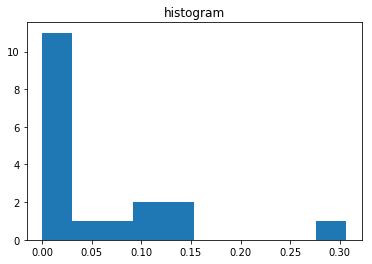

In [130]:

a = np.array(dtc63_model.featureImportances) 
plt.hist(a) 
plt.title("histogram") 
plt.show()

Text(0,0.5,'Importance degree')

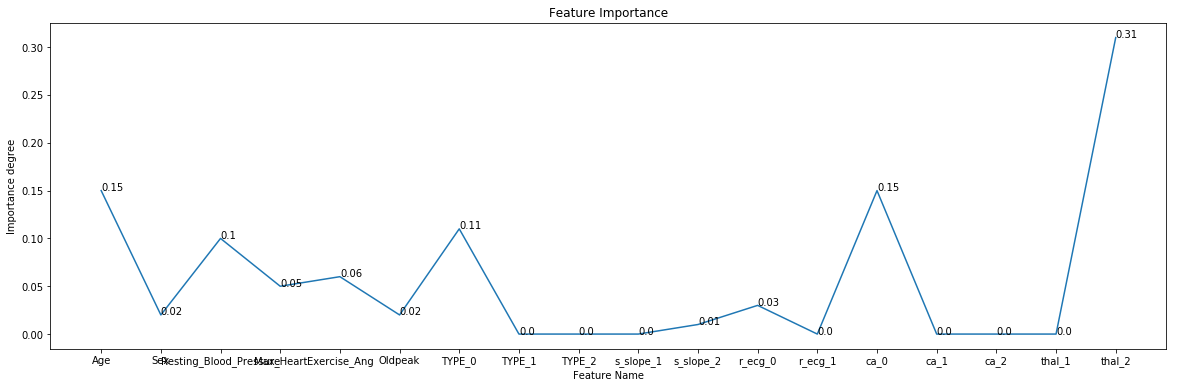

In [121]:
# drawn feature importance 
import numpy as np 
import matplotlib.pyplot as plt 

feature_name = ['Age','Sex','Resting_Blood_Pressure','Max_Heart',
                'Exercise_Ang','Oldpeak','TYPE_0','TYPE_1',
                'TYPE_2','s_slope_1','s_slope_2','r_ecg_0',
                'r_ecg_1','ca_0','ca_1','ca_2','thal_1','thal_2']

#round importance values 
list_importance1 = np.array(dtc63_model.featureImportances)
list_importance = [round(elem, 2) for elem in list_importance1]

plt.figure (figsize =(20,6))
plt.plot (feature_name, list_importance)
for a,b in zip(feature_name, list_importance):
    plt.text (a,b,str(b))
    
#add title
plt.title ('Feature Importance')
plt.xlabel('Feature Name')
plt.ylabel('Importance degree')
                        

In [140]:
dtc63_model.summary.roc.select('FPR').collect()
dtc63_model.summary.roc.select('TPR').collect()

AttributeError: 'DecisionTreeClassificationModel' object has no attribute 'summary'

In [155]:
dtc63_predictions.select("prediction", "TargetIndex", "features").show(30)

+----------+-----------+--------------------+
|prediction|TargetIndex|            features|
+----------+-----------+--------------------+
|       0.0|        0.0|(18,[0,1,2,3,4,5,...|
|       0.0|        0.0|(18,[0,1,2,3,4,5,...|
|       0.0|        0.0|(18,[0,1,2,3,4,5,...|
|       0.0|        0.0|(18,[0,1,2,3,4,5,...|
|       0.0|        0.0|(18,[0,1,2,3,4,5,...|
|       0.0|        0.0|(18,[0,1,2,3,4,5,...|
|       0.0|        0.0|(18,[0,1,2,3,4,5,...|
|       0.0|        0.0|(18,[0,1,2,3,4,5,...|
|       0.0|        0.0|(18,[0,1,2,3,4,5,...|
|       0.0|        0.0|(18,[0,1,2,3,4,5,...|
|       0.0|        1.0|(18,[0,1,2,3,4,5,...|
|       0.0|        0.0|(18,[0,1,2,3,4,5,...|
|       0.0|        0.0|(18,[0,1,2,3,4,5,...|
|       0.0|        0.0|(18,[0,1,2,3,4,5,...|
|       1.0|        1.0|(18,[0,1,2,3,4,5,...|
|       0.0|        0.0|(18,[0,1,2,3,4,6,...|
|       0.0|        0.0|(18,[0,1,2,3,4,6,...|
|       0.0|        0.0|(18,[0,1,2,3,4,6,...|
|       0.0|        0.0|(18,[0,1,2

In [149]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
predictions = dtc63_model.predict(test_data.map(lambda x: x.features))
labelsAndPredictions = test_data.map(lambda lp: lp.label).zip(predictions)
testErr = labelsAndPredictions.filter(
    lambda lp: lp[0] != lp[1]).count() / float(testData.count())
print('Test Error = ' + str(testErr))
print('Learned classification tree model:')
print(model.toDebugString())

AttributeError: 'DecisionTreeClassificationModel' object has no attribute 'predict'

In [162]:
evaluator = BinaryClassificationEvaluator(labelCol = 'TargetIndex')
print("Test Area Under ROC: " + str(evaluator.evaluate(dtc63_predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8751387347391787


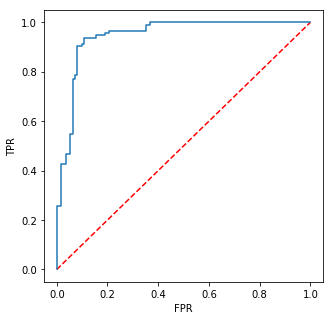

Training set areaUnderROC: 0.9453081399984055


In [165]:
#logisticRegression
lr_model2.summary.roc.select('FPR').collect()
lr_model2.summary.roc.select('TPR').collect()
trainingSummary = lr_model2.summary

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(lr_model2.summary.roc.select('FPR').collect(),
         lr_model2.summary.roc.select('TPR').collect())
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

#print("Coefficients: " + str(lr_model.coefficients))
#print("Intercept: " + str(lr_model.intercept))

In [95]:
mlr = LogisticRegression(featuresCol='features',labelCol='TargetIndex',maxIter=10, regParam=0.3, elasticNetParam=0.8, family="multinomial")
mlr_model = mlr.fit(train_data)

# Print the coefficients and intercepts for logistic regression with multinomial family
print("Multinomial coefficients: " + str(mlr_model.coefficientMatrix))
print("Multinomial intercepts: " + str(mlr_model.interceptVector))

Multinomial coefficients: DenseMatrix([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
               0.        ,  0.10814569,  0.        ,  0.        ,  0.        ,
               0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
               0.        ,  0.        , -0.07560219],
             [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
               0.        , -0.10814569,  0.        ,  0.        ,  0.        ,
               0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
               0.        ,  0.        ,  0.07560219]])
Multinomial intercepts: [0.019398519022809653,-0.019398519022809653]


In [114]:
#Lr 
# Extract the summary from the returned LogisticRegressionModel instance trained
# in the earlier example
trainingSummary = dtc63_model.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)
    


AttributeError: 'DecisionTreeClassificationModel' object has no attribute 'summary'

In [101]:
# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
trainingSummary.roc.show()
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))


+--------------------+--------------------+
|                 FPR|                 TPR|
+--------------------+--------------------+
|                 0.0|                 0.0|
|                 0.0|0.017094017094017096|
|                 0.0| 0.03418803418803419|
|                 0.0| 0.05128205128205128|
|                 0.0| 0.06837606837606838|
|                 0.0| 0.08547008547008547|
|                 0.0| 0.10256410256410256|
|                 0.0| 0.11965811965811966|
|0.016260162601626018|  0.1282051282051282|
|0.016260162601626018|  0.1452991452991453|
|0.016260162601626018|  0.1623931623931624|
|0.016260162601626018|  0.1794871794871795|
|0.024390243902439025| 0.18803418803418803|
|0.024390243902439025| 0.20512820512820512|
|0.024390243902439025|  0.2222222222222222|
|0.024390243902439025| 0.23931623931623933|
|0.024390243902439025|  0.2564102564102564|
|0.024390243902439025| 0.27350427350427353|
|0.024390243902439025|  0.2905982905982906|
|0.024390243902439025|  0.307692

In [100]:
# Set the model threshold to maximize F-Measure
fMeasure = trainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
bestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']
lr.setThreshold(bestThreshold)

LogisticRegression_45a7b847e968d20a38ef

In [160]:
# Let's start off with binary classification.
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Note that the label column isn't named label, it's named PrivateIndex in this case.
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'TargetIndex')

In [117]:
# This is the area under the curve. This indicates that the data is highly seperable.
print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))

# RFC improves accuracy but also model complexity. RFC outperforms DTC in nearly every situation.
print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))

# We can't repeat these exact steps for GBT. If you print the schema of all three, you may be able to notice why.
# Instead, let's redefine the object:
my_binary_gbt_eval = BinaryClassificationEvaluator(labelCol='TargetIndex', rawPredictionCol='prediction')
print("GBT")
print(my_binary_gbt_eval.evaluate(gbt_predictions))

print("LR")
print(my_binary_eval.evaluate(lr_predictions))

# Interesting, GBT didn't perform as well as RFC or DTC. But that's because we left the model's settings as default. 
# In most cases, we should adjust these parameters. More trees may increase accuracy, but decrease precision and recall. 


DTC
0.748157248157248
RFC
0.8938574938574938
GBT
0.7282555282555282


Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 81.82%
----------------------------------------
A random forest ensemble has an accuracy of: 81.82%
----------------------------------------
An ensemble using GBT has an accuracy of: 85.23%
----------------------------------------
An ensemble using LR has an accuracy of: 84.09%
----------------------------------------
An ensemble using NB has an accuracy of: 78.41%


In [112]:
gbt_model.featureImportances 

SparseVector(18, {0: 0.1835, 1: 0.0205, 2: 0.1176, 3: 0.1067, 4: 0.008, 5: 0.1756, 6: 0.1516, 7: 0.0212, 8: 0.0015, 9: 0.0536, 10: 0.0119, 11: 0.0031, 12: 0.0067, 13: 0.071, 14: 0.0055, 17: 0.0619})

In [113]:
print(gbt_model.toDebugString)

GBTClassificationModel (uid=GBTClassifier_4150864ba360e847c5fb) with 20 trees
  Tree 0 (weight 1.0):
    If (feature 6 <= 0.0)
     If (feature 5 <= 1.9)
      If (feature 2 <= 172.0)
       If (feature 0 <= 56.0)
        If (feature 2 <= 108.0)
         Predict: 0.5
        Else (feature 2 > 108.0)
         Predict: 1.0
       Else (feature 0 > 56.0)
        If (feature 0 <= 57.0)
         Predict: -0.3333333333333333
        Else (feature 0 > 57.0)
         Predict: 0.6129032258064516
      Else (feature 2 > 172.0)
       Predict: -1.0
     Else (feature 5 > 1.9)
      If (feature 9 <= 0.0)
       Predict: 1.0
      Else (feature 9 > 0.0)
       Predict: -1.0
    Else (feature 6 > 0.0)
     If (feature 13 <= 0.0)
      If (feature 5 <= 0.2)
       If (feature 1 <= 0.0)
        Predict: 1.0
       Else (feature 1 > 0.0)
        If (feature 3 <= 108.0)
         Predict: 0.0
        Else (feature 3 > 108.0)
         Predict: -1.0
      Else (feature 5 > 0.2)
       Predict: -1.0
     El

In [55]:
#Linear SVM classifier

from pyspark.sql import Row
from pyspark.ml.linalg import Vectors
from pyspark.mllib.classification import SVMWithSGD, SVMModel
from pyspark.mllib.regression import LabeledPoint

svm = SVMWithSGD(featuresCol='features',labelCol='TargetIndex', maxIter=5, regParam=0.01)
model = svm.fit(train_data)
model.coefficients

model.intercept

model.numClasses

model.numFeatures

result_predic = model.transform(train_data)
#result.prediction

#result.rawPrediction

#svm_path = temp_path + "/svm"
# svm.save(svm_path)
#svm2 = LinearSVC.load(svm_path)
#svm2.getMaxIter()

# model_path = temp_path + "/svm_model"
#model.save(model_path)
# model2 = LinearSVCModel.load(model_path)
#model.coefficients[0] == model2.coefficients[0]

#model.intercept == model2.intercept


TypeError: object() takes no parameters

In [ ]:
dtc_ad = DecisionTreeClassifier(
    labelCol='TargetIndex',
    featuresCol='features',
    
    minInfoGain = 0,
    minInstancesPerNode = 3,
    impurity = 'gini')
    
dtcad_model = dtc_ad.fit(train_data)
dtcad_predictions = dtcad_model.transform(test_data)
dtcad_acc = acc_evaluator.evaluate(dtcad_predictions)
print('-'*40)
print('An ensemble using Decision Tree has an accuracy of: {0:2.2f}%'.format(dtcad_acc*100))